In [1]:
import os
import glob

import seaborn as sns
import rasterio
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import matplotlib.image as mpimg

In [2]:
sns.set_theme()

In [3]:
working_dir = r'\\export.hpc.ut.ee\gis\Ditches\working\paper_materials'
os.chdir(working_dir)

In [4]:
map_sheets = [53972, 54591]
numeric_ids = [8, 19]

In [5]:
model = 'FT3A'

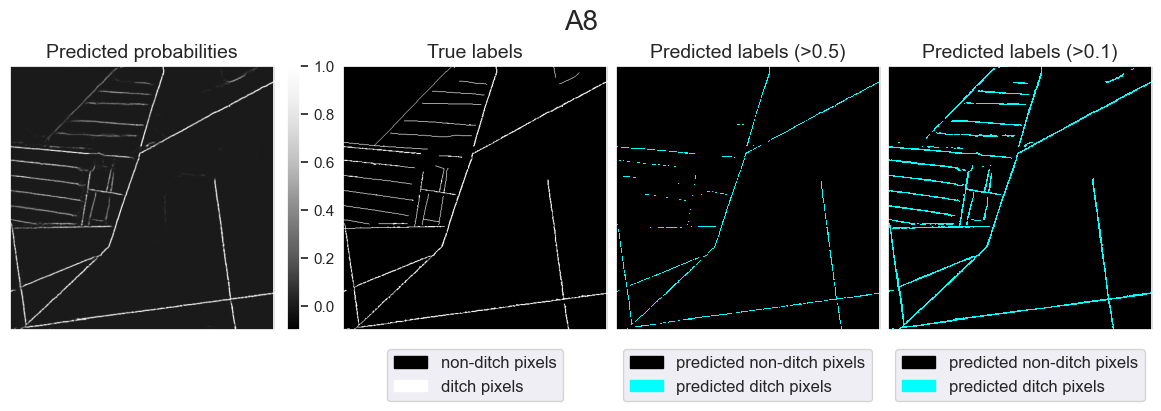

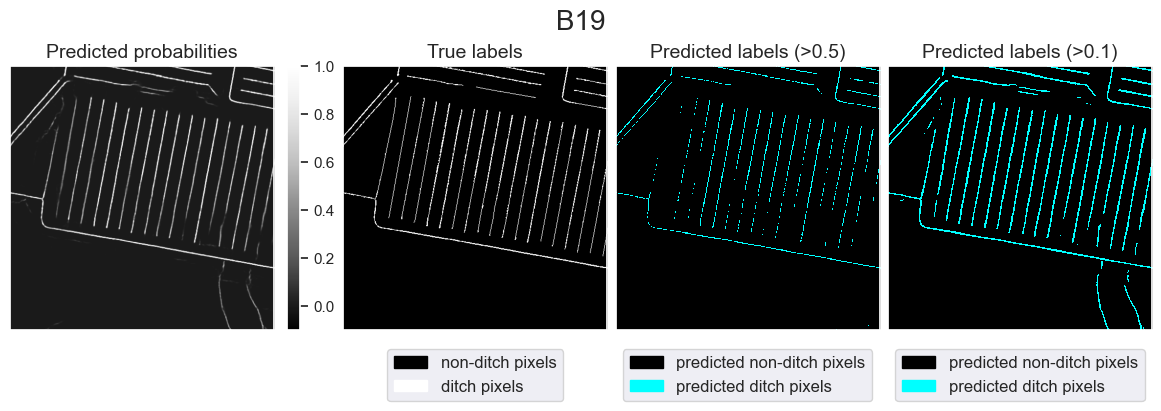

In [6]:
vmin = 1
vmax = 0

for i in range(len(map_sheets)):
    
    map_sheet = map_sheets[i]
    numeric_id = numeric_ids[i]
    tiles = gpd.read_file(f'./{map_sheet}_digitized_tiles.gpkg')
    text_id = tiles[tiles['numeric_id'] == numeric_id]['text_id'].values[0]

    fig, axes = plt.subplots(1, 4, figsize=(16, 4), sharey=True, layout='compressed')

    # Plot predicted probabilities
    ax = axes[0]
    src = rasterio.open(
        fr'\\export.hpc.ut.ee\gis\Ditches\working\deep_learning\data\prediction\predicted_probs\{map_sheet}\{map_sheet}_{numeric_id}.tif'
    )
    im = ax.imshow(src.read(1), cmap='Greys_r', vmin=vmin, vmax=vmax)
    ax.set_title('Predicted probabilities', fontsize=14)
    plt.colorbar(im, ax=ax)

    # Plot true labels
    ax = axes[1]
    src = rasterio.open(fr'\\export.hpc.ut.ee\gis\Ditches\working\deep_learning\data\finetuning\labels\{map_sheet}_{numeric_id}.tif')
    im = ax.imshow(src.read(1), cmap='Greys_r')
    ax.set_title('True labels', fontsize=14)
    handles = [mpatches.Patch(color='black', label='non-ditch pixels'), mpatches.Patch(color='white', label='ditch pixels')]
    ax.legend(handles=handles, loc='lower center', bbox_to_anchor=(0.5, -0.3), fontsize=12)

    # Plot predicted labels based on 0.5 threshold
    ax = axes[2]
    src = rasterio.open(
        fr'\\export.hpc.ut.ee\gis\Ditches\working\deep_learning\data\prediction\predicted_labels_0.5\{map_sheet}\{map_sheet}_{numeric_id}.tif'
    )
    im = ax.imshow(src.read(1), cmap=ListedColormap(['black', 'cyan']))
    ax.set_title('Predicted labels (>0.5)', fontsize=14)
    handles = [mpatches.Patch(color='black', label='predicted non-ditch pixels'), mpatches.Patch(color='cyan', label='predicted ditch pixels')]
    ax.legend(handles=handles, loc='lower center', bbox_to_anchor=(0.5, -0.3), fontsize=12)

    # Plot predicted labels based on 0.1 threshold
    ax = axes[3]
    src = rasterio.open(
        fr'\\export.hpc.ut.ee\gis\Ditches\working\deep_learning\data\prediction\predicted_labels_0.1\{map_sheet}\{map_sheet}_{numeric_id}.tif'
    )
    im = ax.imshow(src.read(1), cmap=ListedColormap(['black', 'cyan']))
    ax.set_title('Predicted labels (>0.1)', fontsize=14)
    handles = [mpatches.Patch(color='black', label='predicted non-ditch pixels'), mpatches.Patch(color='cyan', label='predicted ditch pixels')]
    ax.legend(handles=handles, loc='lower center', bbox_to_anchor=(0.5, -0.3), fontsize=12)

    plt.setp(axes, xticks=[], yticks=[])
    plt.suptitle(text_id, fontsize=20)
    plt.savefig(f'./figures/{map_sheet}_{text_id}_predictions_{model}.png', dpi=300, bbox_inches='tight')

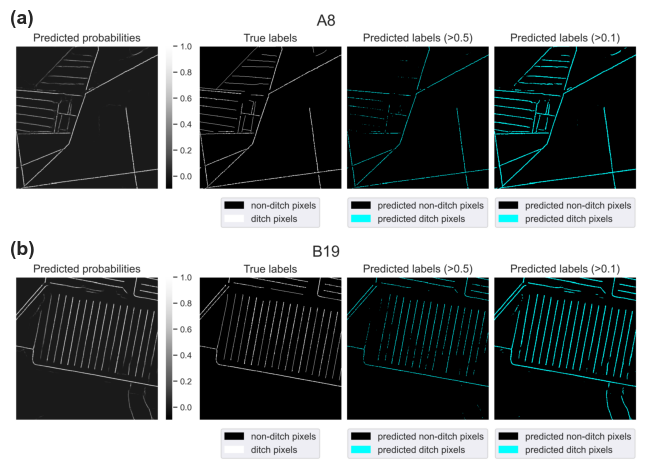

In [7]:
# Combine plots
images = glob.glob(f'./figures/*_*_predictions_{model}.png')
letters = ['(a)', '(b)']
fig, axes = plt.subplots(2, 1, layout='compressed')
for image, letter, ax in zip(images, letters, axes.flatten()):
    img = mpimg.imread(image)
    ax.imshow(img)
    ax.axis('off')
    ax.text(0, 1, letter, transform=ax.transAxes, fontsize=14, fontweight='bold', verticalalignment='top')
plt.savefig(f'./figures/predictions_{model}_combined.png', dpi=300, bbox_inches='tight')

# Plot predictions with orthophoto

In [8]:
map_sheets = [53972, 54591]
numeric_ids = [36, 12]

In [9]:
model = 'FT3A'

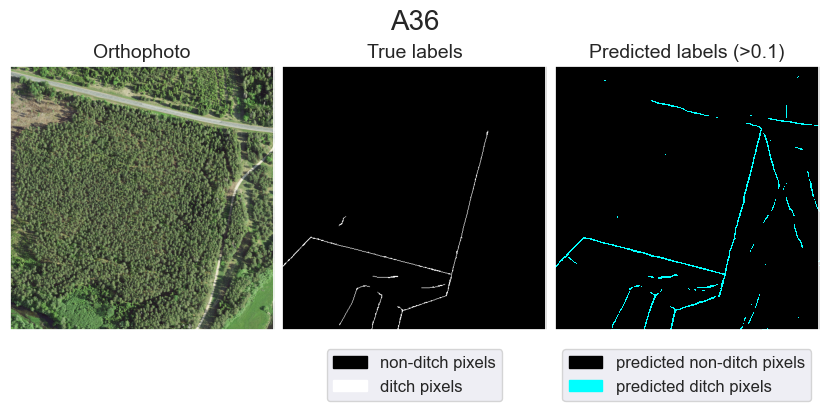

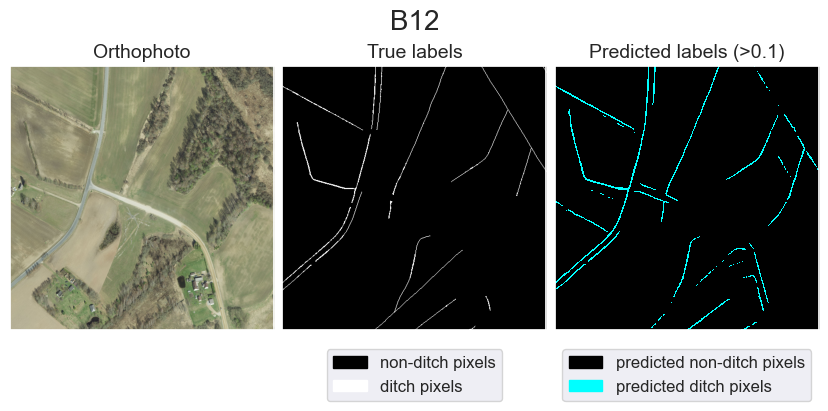

In [10]:
vmin = 1
vmax = 0

for i in range(len(map_sheets)):
    
    map_sheet = map_sheets[i]
    numeric_id = numeric_ids[i]
    tiles = gpd.read_file(f'./{map_sheet}_digitized_tiles.gpkg')
    text_id = tiles[tiles['numeric_id'] == numeric_id]['text_id'].values[0]

    fig, axes = plt.subplots(1, 3, figsize=(12, 4), layout='compressed')

    # Plot orthophoto
    ax = axes[0]
    src = rasterio.open(
        fr'\\export.hpc.ut.ee\gis\Ditches\working\paper_materials\{map_sheet}_{numeric_id}_ortho.tif'
    )
    im = ax.imshow(plt.imread(fr'\\export.hpc.ut.ee\gis\Ditches\working\paper_materials\{map_sheet}_{numeric_id}_ortho.tif'))
    ax.set_title('Orthophoto', fontsize=14)

    # Plot true labels
    ax = axes[1]
    src = rasterio.open(fr'\\export.hpc.ut.ee\gis\Ditches\working\deep_learning\data\finetuning\labels\{map_sheet}_{numeric_id}.tif')
    im = ax.imshow(src.read(1), cmap='Greys_r')
    ax.set_title('True labels', fontsize=14)
    handles = [mpatches.Patch(color='black', label='non-ditch pixels'), mpatches.Patch(color='white', label='ditch pixels')]
    ax.legend(handles=handles, loc='lower center', bbox_to_anchor=(0.5, -0.3), fontsize=12)

    # Plot predicted labels based on 0.1 threshold
    ax = axes[2]
    src = rasterio.open(
        fr'\\export.hpc.ut.ee\gis\Ditches\working\deep_learning\data\prediction\predicted_labels_0.1\{map_sheet}\{map_sheet}_{numeric_id}.tif'
    )
    im = ax.imshow(src.read(1), cmap=ListedColormap(['black', 'cyan']))
    ax.set_title('Predicted labels (>0.1)', fontsize=14)
    handles = [mpatches.Patch(color='black', label='predicted non-ditch pixels'), mpatches.Patch(color='cyan', label='predicted ditch pixels')]
    ax.legend(handles=handles, loc='lower center', bbox_to_anchor=(0.5, -0.3), fontsize=12)

    plt.setp(axes, xticks=[], yticks=[])
    plt.suptitle(text_id, fontsize=20)
    plt.savefig(f'./figures/{map_sheet}_{text_id}_predictions_ortho_{model}.png', dpi=300, bbox_inches='tight')

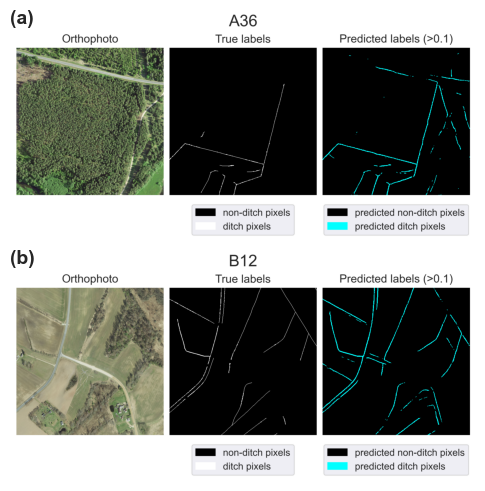

In [11]:
# Combine plots
images = glob.glob(f'./figures/*_*_predictions_ortho_{model}.png')
letters = ['(a)', '(b)']
fig, axes = plt.subplots(2, 1, layout='compressed')
for image, letter, ax in zip(images, letters, axes.flatten()):
    img = mpimg.imread(image)
    ax.imshow(img)
    ax.axis('off')
    ax.text(0, 1, letter, transform=ax.transAxes, fontsize=14, fontweight='bold', verticalalignment='top')
plt.savefig(f'./figures/predictions_ortho_{model}_combined.png', dpi=300, bbox_inches='tight')